#### Bias-variance trade off

The bias-variance tradeoff is a fundamental concept in machine learning that deals with the tradeoff between a model's ability to capture the underlying patterns in the data (bias) and its sensitivity to variations in the training data (variance). Balancing bias and variance is crucial to building models that generalize well to unseen data.

**Bias**:
Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. A high-bias model tends to be too simplistic and might not capture the underlying patterns in the data.

**Variance**:
Variance refers to the model's sensitivity to fluctuations in the training data. A high-variance model is overly complex and may fit the training data too closely, capturing noise rather than the underlying patterns.

**Bias-Variance Tradeoff:**
High Bias: Simple models with few parameters are prone to high bias.
High Variance: Complex models with many parameters are prone to high variance.
The tradeoff arises because increasing model complexity tends to reduce bias but increases variance, and vice versa.

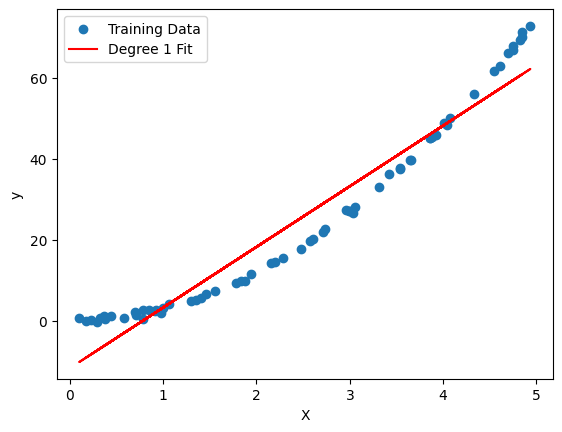

Degree 1 MSE: 28.35


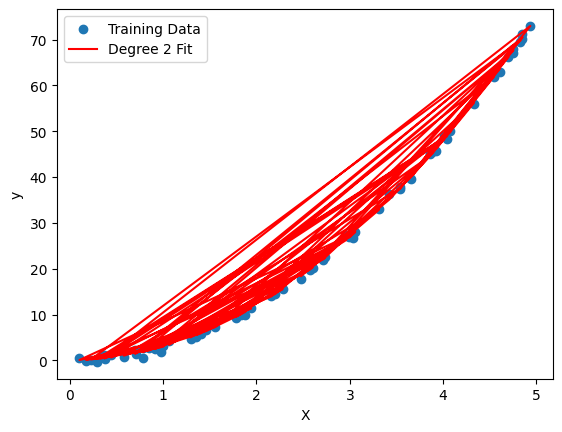

Degree 2 MSE: 0.17


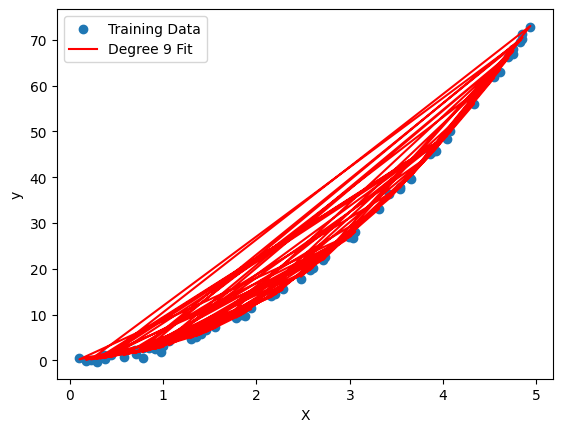

Degree 9 MSE: 0.21


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data with a quadratic relationship
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = 3 * X.squeeze()**2 + 0.5 * np.random.randn(80)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to fit and plot polynomial regression models
def fit_and_plot_polynomial(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict on the training set
    y_train_pred = model.predict(X_poly_train)

    # Plot the training data and the fitted curve
    plt.scatter(X_train, y_train, label='Training Data')
    plt.plot(X_train, y_train_pred, label='Degree ' + str(degree) + ' Fit', color='r')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    # Evaluate on the test set
    X_poly_test = poly_features.transform(X_test)
    y_test_pred = model.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_test_pred)
    print(f'Degree {degree} MSE: {mse:.2f}')

# Try different degrees of polynomial regression
degrees = [1, 2, 9]
for degree in degrees:
    fit_and_plot_polynomial(degree)


> As the degree increases, the model becomes more complex, fitting the training data more closely. However, as the complexity increases beyond a certain point (degree 9 in this case), the model starts capturing noise, leading to overfitting and higher variance on the test set. 